In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [75]:
delta = 1e-1

In [76]:
x = np.arange(0, 100, delta)

In [207]:
def plot(y, normalize=False, new_figure=True):
    if normalize:
        m = np.max(y)
        plt.plot(y/m)
    else:
        plt.plot(y)
    plt.grid(True)
    if new_figure:        
        plt.show()

# Gaussiana

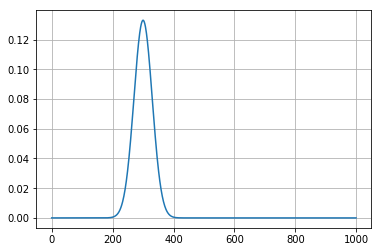

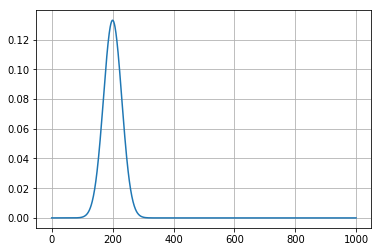

In [208]:
def gaussian(x, mean=0, std=3):
    if abs(x) > 100:
        return 0
    else:
        return (1/(std*math.sqrt(2*math.pi))) * math.exp((-1/2) * ((x - mean) / std) ** 2)
    

gaussian_data = np.array([y for y in map(gaussian, x-30)])
g_gaussian = np.array([y for y in map(gaussian, x-20)])

plot(gaussian_data)
plot(g_gaussian)

# seno

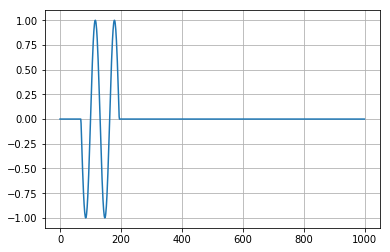

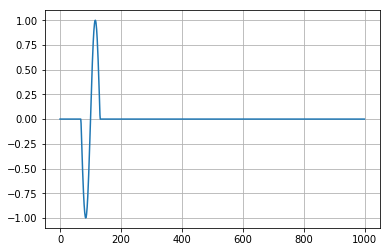

In [136]:
def sin(x):
    if x < -math.pi or x > math.pi:
        return 0
    else:
        return math.sin(x)

sin_data = np.array([y for y in map(sin, x - 10)])
sin_data += np.array([y for y in map(sin, x - 10 - 2*math.pi)])
g_sin = np.array([y for y in map(sin, x-10)])

plot(sin_data)
plot(g_sin)

# rampa

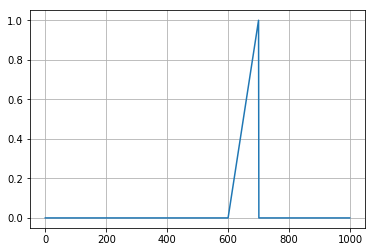

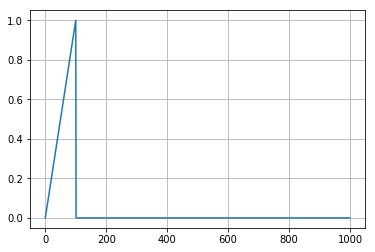

In [119]:
def rampa(x):
    if x < 0 or x > 1:
        return 0
    else:
        return x

rampa_data = np.array([y for y in map(rampa, x/10 - 6)])
g_rampa = np.array([y for y in map(rampa, x/10)])

plot(rampa_data)
plot(g_rampa)

# platô


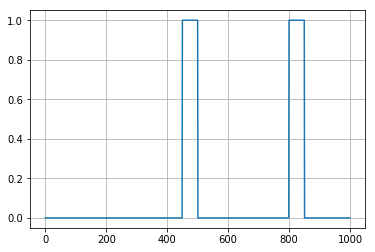

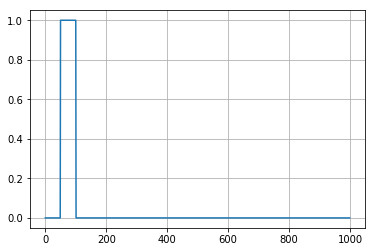

In [125]:
def plato(x):
    if x < 0 or x > 1:
        return 0
    else:
        return 1
    
plato_data = np.array([y for y in map(plato, x/5 - 16)])
plato_data += np.array([y for y in map(plato, x/5 - 9)])
g_plato = np.array([y for y in map(plato, x/5 - 1)])

plot(plato_data)
plot(g_plato)

# pulso

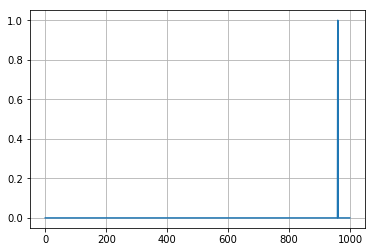

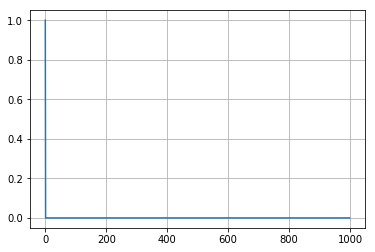

In [128]:
def pulso(x):
    if abs(x) < 1e-4:
        return 1
    else:
        return 0
    
pulso_data = np.array([y for y in map(pulso, x - 96)])
g_pulso = np.array([y for y in map(pulso, x)])

plot(pulso_data)
plot(g_pulso)

# função h

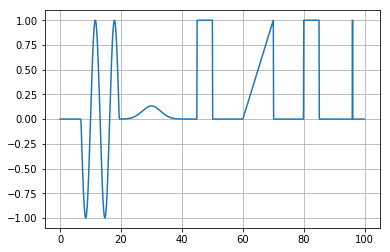

In [131]:
h = sin_data + rampa_data + plato_data + pulso_data + gaussian_data
plt.plot(x, h)
plt.grid(True)
plt.show()

# Correlação

In [191]:
def correlacao(f: np.ndarray, g: np.ndarray):
    n = f.shape[0]
    m = g.shape[0]
    
    a = 0
    b = n-1
    c = 0
    d = m-1
    
    z = np.zeros(n-1)
    g = np.concatenate([z, g, z], axis=0)
    g = np.conjugate(g)
    
    cc = c - n + 1
    dd = d + n - 1
    
    if str(f.dtype).startswith('complex') or str(g.dtype).startswith('complex'):
        corr = np.zeros(n+m-1, dtype=np.complex)
    else:
        corr = np.zeros(n+m-1)
    
    for k in range(c-b, d-a+1):
        aux = 0
        for i in range(a, b+1):
            aux += f[i-a] * g[k+i-cc]
        corr[k-c+b] = aux
        
    return corr

In [192]:
u = np.array([1+3j, 2, 3, 4, 6], dtype=np.complex)
v = np.array([1, 2], dtype=np.complex)

print(correlacao(u, v))

[ 6.+0.j 16.+0.j 11.+0.j  8.+0.j  5.+3.j  2.+6.j]


In [193]:
print(np.correlate(u, v, mode='full'))

[ 2.+6.j  5.+3.j  8.+0.j 11.+0.j 16.+0.j  6.+0.j]


# Convolução

In [142]:
def convolution(g: np.ndarray, h: np.ndarray):
    n = g.shape[0]
    m = h.shape[0]
    
    a = 0
    b = n-1
    c = 0
    d = m-1
    
    z = np.zeros(n-1)
    h = np.concatenate([z, h, z], axis=0)
    
    cc = c - n + 1
    dd = d + n - 1
    
    conv = np.zeros(n+m-1)
        
    for k in range(c+a, d+b+1):
        aux = 0
        for i in range(a, b+1):
            aux += g[i-a] * h[k-i-cc]
        conv[k-c-a] = aux
        
    return conv

In [181]:
u = np.array([1, 2, 3, 4, 6])
v = np.array([1, 2])

print(convolution(u, v))
print(convolution(v, u))

[ 1.  4.  7. 10. 14. 12.]
[ 1.  4.  7. 10. 14. 12.]


In [183]:
print(np.convolve(u, v, mode='full'))
print(np.convolve(v, u, mode='full'))

[ 1  4  7 10 14 12]
[ 1  4  7 10 14 12]


# Aplicando correlação e convolução

## Gaussiana

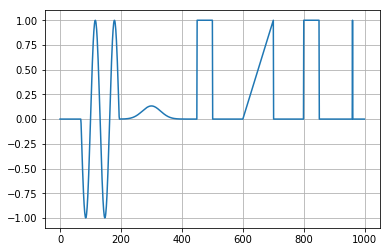

In [221]:
plot(h, new_figure=False, normalize=True)

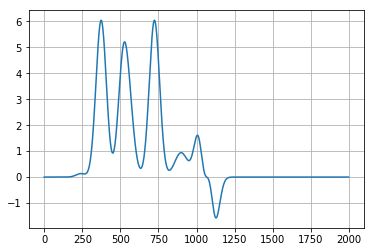

In [222]:
plot(correlacao(h, g_gaussian))

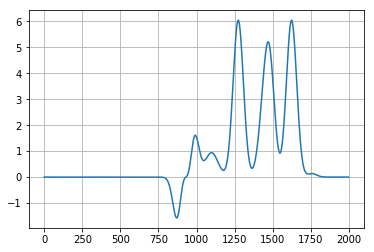

In [223]:
plot(correlacao(g_gaussian, h))

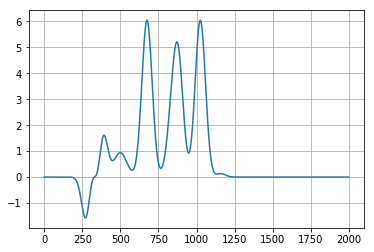

In [224]:
plot(convolution(h, g_gaussian))

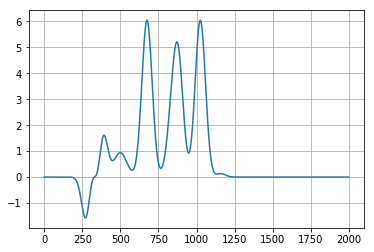

In [225]:
plot(convolution(g_gaussian, h))

## seno

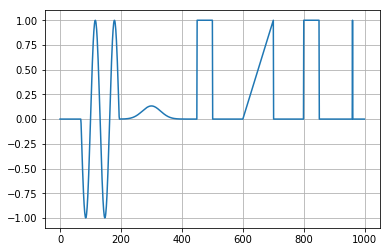

In [226]:
plot(h, new_figure=False, normalize=True)

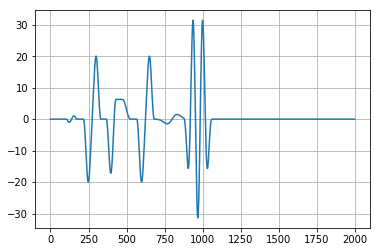

In [229]:
plot(correlacao(h, g_sin))

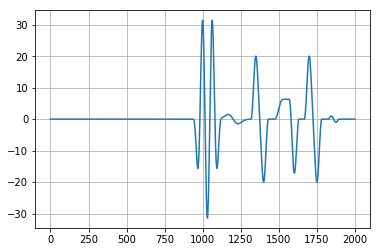

In [230]:
plot(correlacao(g_sin, h))

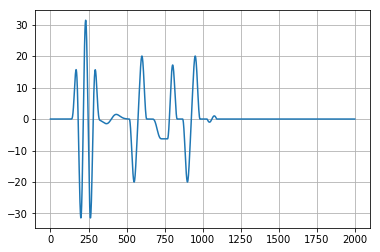

In [227]:
plot(convolution(h, g_sin))

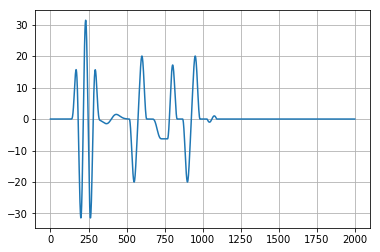

In [228]:
plot(convolution(g_sin, h))

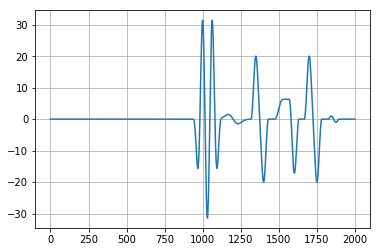

In [244]:
plot(convolution(g_sin[::-1], h))

## platô

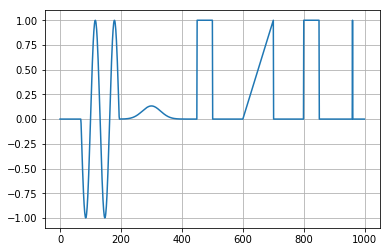

In [215]:
plot(h, new_figure=False, normalize=True)

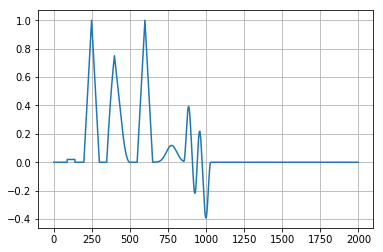

In [217]:
plot(correlacao(h, g_plato), new_figure=False, normalize=True)

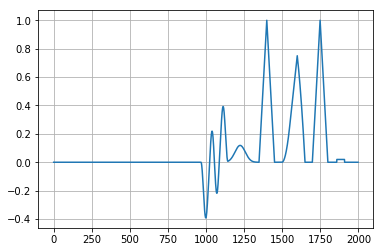

In [218]:
plot(correlacao(g_plato, h), new_figure=False, normalize=True)

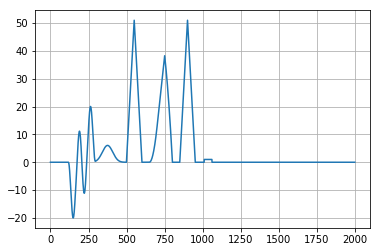

In [219]:
plot(convolution(h, g_plato))

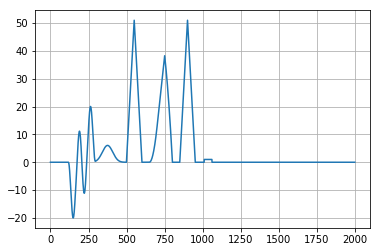

In [220]:
plot(convolution(g_plato, h))

## rampa

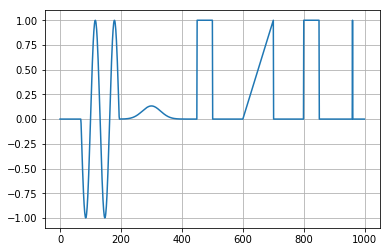

In [239]:
plot(h)

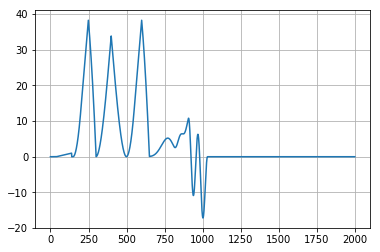

In [235]:
plot(correlacao(h, g_rampa))

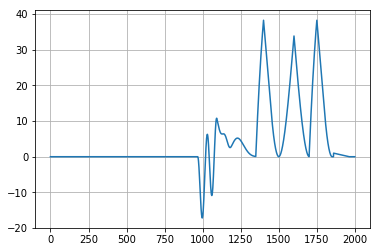

In [236]:
plot(correlacao(g_rampa, h))

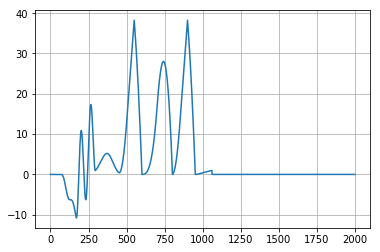

In [237]:
plot(convolution(h, g_rampa))

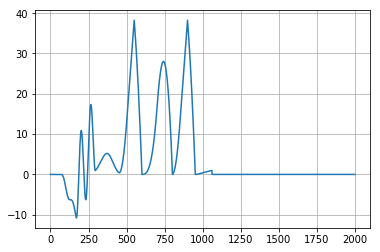

In [238]:
plot(convolution(g_rampa, h))

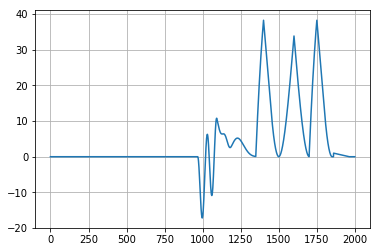

In [240]:
plot(convolution(g_rampa[::-1], h))

## pulso

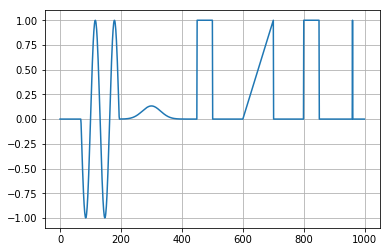

In [245]:
plot(h)

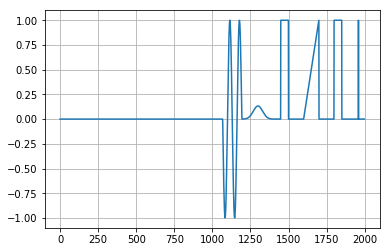

In [246]:
plot(correlacao(g_pulso, h))

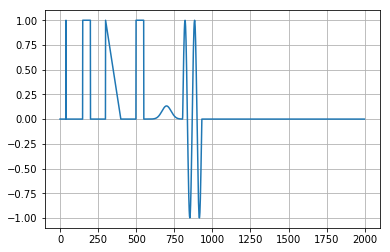

In [247]:
plot(correlacao(h, g_pulso))

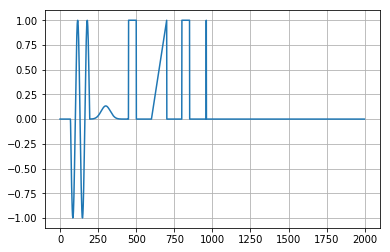

In [248]:
plot(convolution(g_pulso, h))

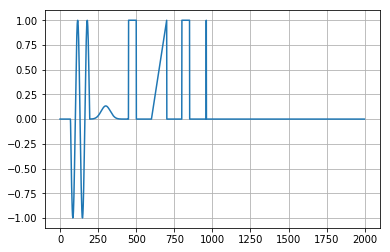

In [249]:
plot(convolution(h, g_pulso))